3670


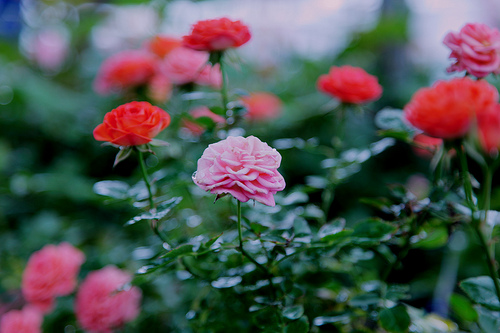

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import pathlib

# load in dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

# count how many images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

# display one class
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [94]:
# define parameters for loader
batch_size = 32
img_height = 180
img_width = 180

def split_dataset(ds, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, shuffle=True):
    dataset_size = len(ds)
    train_size = int(train_ratio * dataset_size)
    val_size = int(val_ratio * dataset_size)
    test_size = dataset_size - train_size - val_size
    if shuffle:
        ds = ds.shuffle(dataset_size)
    train_dataset = ds.take(train_size)
    val_dataset = ds.skip(train_size).take(val_size)
    test_dataset = ds.skip(train_size + val_size).take(test_size)
    return train_dataset, val_dataset, test_dataset

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    # validation_split=0,
    # subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

classes = dataset.class_names
print(classes)

train_ds, val_ds, test_ds = split_dataset(dataset)

y = np.concatenate([y for x, y in train_ds], axis=0)
print(y)

x = np.concatenate([x for x, y in train_ds], axis=0)


Found 3670 files belonging to 5 classes.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
[3 4 1 ... 4 2 3]


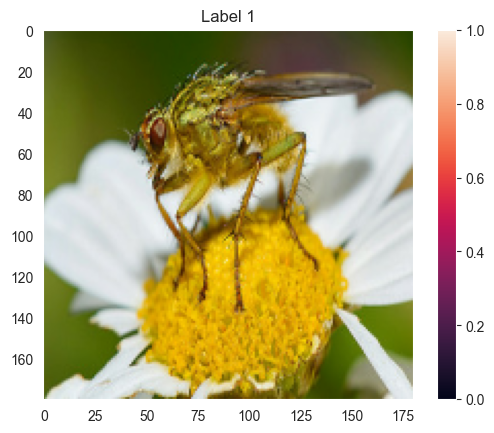

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# for image, label in train_ds.take(1):
#     break
image = x[2] / 255.0
# image = image.numpy()
plt.figure()
plt.imshow(image) #, cmap=plt.cm.binary)
plt.title('Label {}'.format(y[2]))
plt.colorbar()
plt.grid(False)
plt.show()
# spot checking, label doesn't match class name 